## Pointwise Bound Comparison

<IPython.core.display.Javascript object>


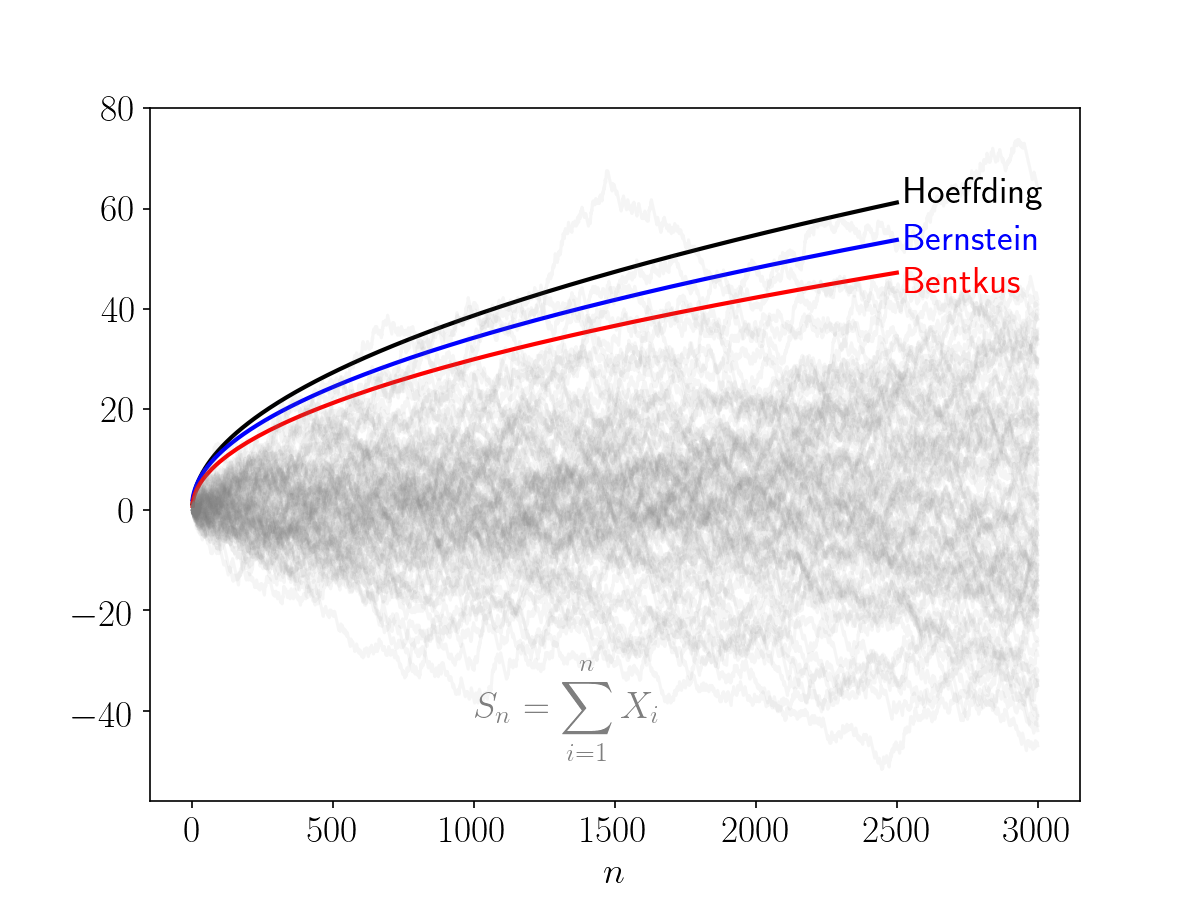

Hoeffding $0.00205 \pm 0.00261$,
Bernstein $0.00593 \pm 0.0044$,
Bentkus $0.014 \pm 0.00608$.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import scipy.optimize
import scipy.special


from matplotlib import rc
plt.style.use('default')
rc('text', usetex=True)

from conc_ineq.hoeffding import hoeffding
from conc_ineq.bernstein import bernstein
from conc_ineq.bentkus import bentkus


### Xi ~ Bernoulli(p)
np.random.seed(234)
p = 0.25 
A = np.sqrt(p*(1-p)) # i.e. A = np.sqrt(3)/4 
B = 1 - p
delta = 0.05

N = 3000
ns = np.arange(1, N+1)
rep = 300



fn_h = np.array([hoeffding(n, delta, upper=1.0, lower=0) for n in ns])
fn_bs = np.array([bernstein(n, delta, A, B) for n in ns])
fn_ref = np.array([bentkus(n, delta, A, B) for n in ns])


fig = plt.figure(figsize=(8, 6))
plt.plot(ns[:2500], fn_h[:2500], 'k', linewidth=2)
plt.plot(ns[:2500], fn_bs[:2500], 'b', linewidth=2)
plt.plot(ns[:2500], fn_ref[:2500], 'r', linewidth=2)

plt.plot(0, 0, '-', color='C1', linewidth=2)

fail_h = np.zeros(N)
fail_bs = np.zeros(N)
fail_ref = np.zeros(N)

for ii in range(rep):
    X = np.random.binomial(1, p=p, size=(N,)) - p
    Sn = np.cumsum(X)
    if ii % 3 == 1:
        plt.plot(ns, Sn, '-', color='C7', alpha=0.07)
    fail_h += Sn >= fn_h
    fail_bs += Sn >= fn_bs
    fail_ref += Sn >= fn_ref
    
plt.xlabel(r'$n$', fontsize=18)
plt.text(2530, fn_h[2500], 'Hoeffding', rotation=0, color='k',fontsize=18,  backgroundcolor='None')
plt.text(2530, fn_bs[2500]-2, 'Bernstein', rotation=0, color='b',fontsize=18, backgroundcolor='None')
plt.text(2530, fn_ref[2500]-4, 'Bentkus', rotation=0, color='r',fontsize=18, backgroundcolor='None')
plt.text(1000, -50, r'$$S_n = \sum_{i=1}^n X_i$$', rotation=0, color='C7', fontsize=18, backgroundcolor='None')
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.savefig('./figure/pointwise_bernoulli_n2500.pdf', bbox_inches='tight', pad_inches=0)

print("Hoeffding ${} \pm {}$,".format(
    np.round(np.mean(fail_h/rep), 5),
    np.round(np.std(fail_h/rep), 5)
))

print("Bernstein ${} \pm {}$,".format(
    np.round(np.mean(fail_bs/rep), 5),
    np.round(np.std(fail_bs/rep), 5)
))

print("Bentkus ${} \pm {}$.".format(
    np.round(np.mean(fail_ref/rep), 5),
    np.round(np.std(fail_ref/rep), 5)
))